# Singleton 패턴


## S.1 소개

* Singleton 패턴은 Creational Design Pattern
* 객체를 중복해서 생성하게 되면, 자원의 낭비가 있게 된다. 이 패턴은 서비스객체를 중복해서 생성하지 않고, 재사용하게 하는 패턴을 말한다.
* only one instance to provide a global point of access to it (p.177)
* 프린트 spooler는 출력을 보낼 때마다 하나의 pool에서 처리한다.
* 데이터베이스는 모든 사용자에게 무제한으로 연결을 제공하지 않는다.
* 로그는 화면 또는 파일 등에 작성하여 저장된다. 하나의 logger를 사용해서 처리하고, 누구나 그 logger를 사용하게 제한한다. 

* 디자인패턴 요소

요소 | 설명
---|---
name | Singleton
problem | 여러 객체가 생성되면 상태관리 어려움.
solution | 객체 생성자를 중앙 관리
consequence | 객체가 1개라서 일관된 상태

* 프로그래밍 예제
    * HFDP 'Chocolate Factory'
    * thread
    * 프린터 spooler, Logger, DB pool
    * 과제
        * case extension
            * ChocolateBoiler threadsafe
        * new case - Printer spooler

## S.2 문제

* 커피를 만드는 바리스타가 많은 경우, 주문이 단일화되지 않으면 문제가 발생할 수 있다.
    * 고객이 커피를 주문한다.
    * 커피가 오랫 동안 나오지 않아서, 다른 바리스타에게 '커피가 나오지 않았다'고 말하는 경우
    * 바리스타는 누가 커피를 만들고 있는지 서로 확인하지 않고, 새로 커피를 만들게 되면 문제가 된다.
    * 하나의 주문에 커피는 여러 잔이 나올 수 있게 된다.

문제 | 해결방안
-----|-----
'커피가 나오지 않았다'고 할 때마다 커피를 만드는 문제 | thread 제어
주문을 받고, 관리하는 창구의 '단일화' 문제 | 객체를 1개만 생성
한 사람이 대량으로 주문을 처리하는 '독점'의 문제 | 우선순위 조정

In [1]:
import iplantuml

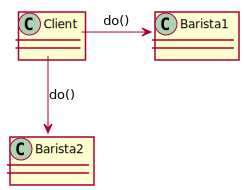

In [2]:
%%plantuml
@startuml
class Client

Client -right-> Barista1:do()
Client -down-> Barista2:do()
@enduml

## S.3 설계

### S.3.1 설계에 고려할 사항:

#### 언제 객체를 생성할 것인가?

* eager initialization
    * Singleton 객체는 처음 클래스를 생성하는, 즉 가장 빠른 시점에 생성한다.
    * 처음에 생성하므로 자원 소모가 많다.
    * 클래스 생성 시점에 만들어 지게 되면서 예외처리를 하기 어렵다.
```
private static Singleton instance = new Singleton(); 클래스생성 시점에 Singleton 만듦
private Singleton(){}
public static Singleton getInstance(){
    return instance;
}
```

* lazy initialization
    * 'public static Singleton getInstance()' 함수에서, 즉 필요한 시점에 생성한다.

#### 사용중인 경우 어떻게 할 것인가?

* '회의실'이 사용중이라면, 여러 팀이 사용하지 못하게 한다. 해결방안으로 한 팀이 들어가면 문을 잠그고 사용한다.

* threadsafe
    * 단일화된 창구함수 getInstance()를 동기화synchronized해서, 동시에 하나의 thread만 사용할 수 있게 한다.
```
public static synchronized Singleton getInstance()
```

* DCL Double Checked Locking (p.182)
    * threadsafe에서 동기화를 유지하려면:
        * thread가 동시에 동일한 함수를 사용하지 못하게 함.
        * the synchronized block is used with 'if'문
        * 사용하는 thread는 잠금사용. 다른 thread가 사용하려면 대기. 

#### 사용중인지 어떻게 알 것인가?

* '회의실'이 사용되고 있는지 어떻게 알 수 있는지 방법을 찾아 본다. 

구분 | 설명 | 비유
-----|-----|-----
static | 클래스변수에 instance를 저장하고 공유. | '회의실'이 사용중이면 전광판으로 알려 준다.
if문 | 생성되어 있는지 확인, 생성되지 않는 경우만 생성. | 사용하는지 확인하고 사용하고 있으면 못하게 한다.
private | instance를 직접 사용하지 못하게, getInstance() 함수로 통일 | 회의실 예약 전담직원

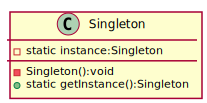

In [3]:
%%plantuml
@startuml
class Singleton {
    -static instance:Singleton
    -Singleton():void
    +static getInstance():Singleton
}
@enduml

## S.4 사례

* classic - no thread, lazy init
* stat - eager init
* thread - synchronized
    * multiple threads running - concurrency problem
    * 한 쓰레드가 파일에 쓰는 경우, 다른 쓰레드가 열고 쓰고 닫는 경우 데이터가 유실
* DCL - volatile
    * 동기화 - volatile 변수는 동기화된 결과를 공유
    * 파일에 쓰는 경우, 모든 쓰레드가 그 결과를 공유
* subclass - protected

### S.4.1 classic

* instance를 private static으로 생성함.
    * private
        * public getInstacne()함수를 통하지 않고는 인스턴스를 만들 수 없다.
    * static
        * 객체가 아닌 클래스 변수.
        * 객체를 생성한 횟수를 세거나, 상수를 선언해서 사용 (예: java.lang.Math PI, abs())
* lazy instantiation
    * 필요한 때 객체 생성

* classic 'Chocolate Boiler'

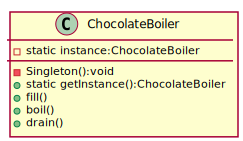

In [4]:
%%plantuml
@startuml
class ChocolateBoiler {
    -static instance:ChocolateBoiler
    -Singleton():void
    +static getInstance():ChocolateBoiler
    +fill()
    +boil()
    +drain()
}
@enduml

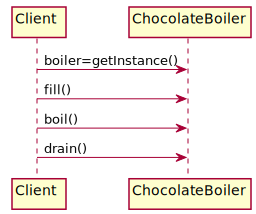

In [42]:
%%plantuml
@startuml
Client -> ChocolateBoiler:boiler=getInstance()
Client -> ChocolateBoiler:fill()
Client -> ChocolateBoiler:boil()
Client -> ChocolateBoiler:drain()
@enduml

In [ ]:
# %load ./src/headfirst/singleton/chocolate/ChocolateBoiler.java
package headfirst.singleton.chocolate;
 
public class ChocolateBoiler {
	private boolean empty;
	private boolean boiled;
	private static ChocolateBoiler uniqueInstance;
        private static int numCalled=0;   //20151025 jsl
  
	private ChocolateBoiler() {
		empty = true;
		boiled = false;
	}
  
	public static ChocolateBoiler getInstance() {
		if (uniqueInstance == null) {
			System.out.println("Creating unique instance of Chocolate Boiler");
			uniqueInstance = new ChocolateBoiler();
		}
		System.out.println("Returning instance of Chocolate Boiler");
		System.out.println("jsl: numCalled "+numCalled++);
		return uniqueInstance;
	}

	public void fill() {
		if (isEmpty()) {
			empty = false;
			boiled = false;
			// fill the boiler with a milk/chocolate mixture
		}
	}
 
	public void drain() {
		if (!isEmpty() && isBoiled()) {
			// drain the boiled milk and chocolate
			empty = true;
		}
	}
 
	public void boil() {
		if (!isEmpty() && !isBoiled()) {
			// bring the contents to a boil
			boiled = true;
		}
	}
  
	public boolean isEmpty() {
		return empty;
	}
 
	public boolean isBoiled() {
		return boiled;
	}
}


In [ ]:
# %load ./src/headfirst/singleton/chocolate/ChocolateController.java
package headfirst.singleton.chocolate;
 
public class ChocolateController {
	public static void main(String args[]) {
		ChocolateBoiler boiler = ChocolateBoiler.getInstance();
		boiler.fill();
		boiler.boil();
		boiler.drain();

		// will return the existing instance
		ChocolateBoiler boiler2 = ChocolateBoiler.getInstance();
	}
}


In [27]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/chocolate/*.java
!java -cp classes/ headfirst.singleton.chocolate.ChocolateController

Creating unique instance of Chocolate Boiler
Returning instance of Chocolate Boiler
jsl: numCalled 0
Returning instance of Chocolate Boiler
jsl: numCalled 1


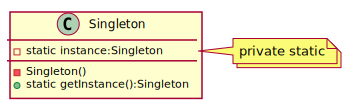

In [6]:
%%plantuml
@startuml

class Singleton {
    -static instance:Singleton
    -Singleton()
    +static getInstance():Singleton
}
note right
private static
end note
@enduml

In [ ]:
# %load ./src/headfirst/singleton/classic/Singleton.java
package headfirst.singleton.classic;

public class Singleton {
	private static Singleton uniqueInstance;
    private static int numCalled=0;
	private Singleton() {}
 
	public static Singleton getInstance() {
		if (uniqueInstance == null) {
			uniqueInstance = new Singleton();
		}
                System.out.println("numCalled: "+numCalled++);
		return uniqueInstance;
	}
}


In [ ]:
# %load ./src/headfirst/singleton/classic/SingletonMain.java
/*
 * @author jsl
 * @version 20151025
 * copied from stat/SingletonClient.java
 */
package headfirst.singleton.classic;

public class SingletonMain {
	public static void main(String[] args) {
		Singleton singleton1 = Singleton.getInstance();
		Singleton singleton2 = Singleton.getInstance();
		Singleton singleton3 = Singleton.getInstance();
	}
}


In [9]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/classic/*.java
!java -cp classes/ headfirst.singleton.classic.SingletonMain

numCalled: 0
numCalled: 1
numCalled: 2


### S.4.2 eager instantiation

* Singleton객체 생성하는 시점을 생성자에서.
* 6.1과 class diagram동일.

In [ ]:
# %load ./src/headfirst/singleton/stat/Singleton.java
package headfirst.singleton.stat;

public class Singleton {
    private static Singleton uniqueInstance = new Singleton();
    private static int numCalled=0;
 
    private Singleton() {}
 
    public static Singleton getInstance() {
        System.out.println("num of called: "+numCalled++);
        return uniqueInstance;
    }
}


In [ ]:
# %load ./src/headfirst/singleton/stat/SingletonClient.java
package headfirst.singleton.stat;

public class SingletonClient {
    public static void main(String[] args) {
            Singleton singleton1 = Singleton.getInstance();
            Singleton singleton2 = Singleton.getInstance();
    }
}


In [12]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/stat/*.java
!java -cp classes/ headfirst.singleton.stat.SingletonClient

num of called: 0
num of called: 1


### S.4.3 thread

* 5.1과 동일하지만 thread safe
* getInstance()함수를 synchronized로 구현한다.
* 그러나, 한 Thread가 그 함수를 사용하고 떠나면, 다른 Thread가 그 함수를 사용할 수 있게 된다.

In [ ]:
# %load ./src/headfirst/singleton/threadsafe/Singleton.java
package headfirst.singleton.threadsafe;

public class Singleton {
    private static Singleton uniqueInstance;
    private static int numCalled=0;
    private Singleton() {}
 
    public static synchronized Singleton getInstance() {
        if (uniqueInstance == null) {
            uniqueInstance = new Singleton();
        }
        System.out.println("numCalled: "+numCalled++);
        return uniqueInstance;
    }
}


In [ ]:
# %load ./src/headfirst/singleton/threadsafe/SingletonMain.java

package headfirst.singleton.threadsafe;

public class SingletonMain {
    public static void main(String[] args) {
        Singleton singleton1 = Singleton.getInstance();
        Singleton singleton2 = Singleton.getInstance();
        Singleton singleton3 = Singleton.getInstance();
    }
}


In [15]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/threadsafe/*.java
!java -cp classes/ headfirst.singleton.threadsafe.SingletonMain

numCalled: 0
numCalled: 1
numCalled: 2


### S.4.4 DCL

* getInstance()함수만을 synchroized를 하는 문제를 보완한다.
* Singleton 클래스 자체를 synchorized로 구현한다.
    * 클래스가 synchronized이므로, volatile로 만든다.
    * volatile은 Thread가 각자 사용하는 CPU cache의 값이 서로 다를 수 있는 차이를 방지한다.
    * Thread 1이 자신의 CPU cache 값을 변경하면, 곧 main memory 값을 변경하게 된다.
    * 즉 CPU cache memory와 main memory의 값을 동일하게 만든다.



In [ ]:
# %load ./src/headfirst/singleton/dcl/Singleton.java
package headfirst.singleton.dcl;

//
// Danger!  This implementation of Singleton not
// guaranteed to work prior to Java 5
//

public class Singleton {
    private volatile static Singleton uniqueInstance;
    private static int numCalled=0;
 
    private Singleton() {}

    public static Singleton getInstance() {
        if (uniqueInstance == null) {
            synchronized (Singleton.class) {
                if (uniqueInstance == null) {
                    uniqueInstance = new Singleton();
                }
            }
        }
        System.out.println("numCalled: "+numCalled++);
        return uniqueInstance;
    }
}


In [ ]:
# %load ./src/headfirst/singleton/dcl/SingletonClient.java
package headfirst.singleton.dcl;

public class SingletonClient {
    public static void main(String[] args) {
            Singleton singleton1 = Singleton.getInstance();
            Singleton singleton2 = Singleton.getInstance();
    }
}


In [19]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/dcl/*.java
!java -cp classes/ headfirst.singleton.dcl.SingletonClient

numCalled: 0
numCalled: 1


### S.5.5 subclass

* 상속인 경우의 singleton

In [ ]:
# %load ./src/headfirst/singleton/subclass/Singleton.java
package headfirst.singleton.subclass;

public class Singleton {
	protected static Singleton uniqueInstance;
 
	// other useful instance variables here
 
	protected Singleton() {}
 
	public static synchronized Singleton getInstance() {
		if (uniqueInstance == null) {
			uniqueInstance = new Singleton();
		}
		return uniqueInstance;
	}
 
	// other useful methods here
}


In [ ]:
# %load ./src/headfirst/singleton/subclass/CoolerSingleton.java
package headfirst.singleton.subclass;

public class CoolerSingleton extends Singleton {
	// useful instance variables here
	protected static Singleton uniqueInstance;
 
	private CoolerSingleton() {
		super();
	}
 
	// useful methods here
}


In [ ]:
# %load ./src/headfirst/singleton/subclass/HotterSingleton.java
package headfirst.singleton.subclass;

public class HotterSingleton extends Singleton {
	// useful instance variables here
 
	private HotterSingleton() {
		super();
	}
 
	// useful methods here
}


In [ ]:
# %load ./src/headfirst/singleton/subclass/SingletonTestDrive.java
package headfirst.singleton.subclass;

public class SingletonTestDrive {
	public static void main(String[] args) {
		Singleton foo = CoolerSingleton.getInstance();
		Singleton bar = HotterSingleton.getInstance();
		System.out.println(foo);
		System.out.println(bar);
 	}
}


In [24]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/subclass/*.java
!java -cp classes/ headfirst.singleton.subclass.SingletonTestDrive

headfirst.singleton.subclass.Singleton@5984cf08
headfirst.singleton.subclass.Singleton@5984cf08
